In [1]:
%pylab inline
from astropy import units
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from profiles import *

In [3]:
#G = constants.G
H = 67.8 * units.km / units.s / units.Mpc
print G, H

4.51835939627e-39 kpc3 / (s2 solMass) 67.8 km / (Mpc s)


In [4]:
IC_chervin = loadtxt('../ICs/MW_models/MW1/chevin_rotcurve.txt', skiprows=1)
IC_hack = loadtxt('../ICs/MW_models/MW1/MW1_rotcurve.txt', skiprows=1)

In [5]:
x = linspace(0, 261)

In [17]:
# Models
h = 0.7
#-----------------------------------------
M_chervin_halo = 92.94E10 / h # from lsf.out of GalIC 200
A_chervin_halo = 28.1096 / h  # 200
print "chervin = ", M_chervin_halo, A_chervin_halo
#-----------------------------------------
M_analytic = 1.4669E12 
A_analytic = 53.07
print "Analytic =", M_analytic, A_analytic

chervin =  1.32771428571e+12 40.1565714286
Analytic = 1.4669e+12 53.07


In [18]:
vc_c_teo = vc_hernquist(A_chervin_halo, x, 0, 0, M_chervin_halo)

In [ ]:
rho_Hernquist = dens_hernquist

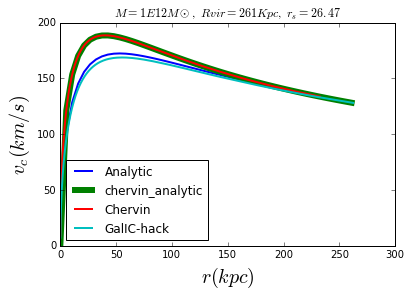

In [22]:
plot(x,  vc_halo, label='Analytic', lw=2)
plot(x, vc_c_teo, label='chervin_analytic', lw=6)
plot(IC_chervin[:,0]/0.7, IC_chervin[:,2], label='Chervin', lw=2)
#plot(x, vc_N)
plot(IC_hack[:,0]/0.7, IC_hack[:,2], label='GalIC-hack', lw=2)
legend(loc='best')
savefig('halo_MW.png', bbox_inches='tight')

xlabel('$r(kpc)$', fontsize=20)
ylabel('$v_c(km/s)$', fontsize=20)
title('$M = 1E12M\odot,\ Rvir=261Kpc,\ r_s = 26.47$')
savefig('MW_rotcurves.png', bbox_inches='tight')

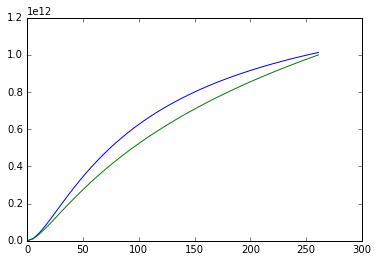

In [7]:
plot(x, M_hernquist)
plot(x, M_NFW)

## LMC1 rotation curves 

In [25]:
#data_n = loadtxt('../data/ICs/LMC/curve1_n.txt', skiprows=1)
data_n_LMC1 = loadtxt('../ICs/LMC/LMC1_rotcurve.txt' , skiprows=1)
data_n_LMC2 = loadtxt('../ICs/LMC/LMC2_rotcurve.txt' , skiprows=1)
data_n_LMC3 = loadtxt('../ICs/LMC/LMC3_rotcurve.txt' , skiprows=1)
data_n_LMC4 = loadtxt('../ICs/LMC/LMC4_rotcurve.txt' , skiprows=1)
data_n_LMC5 = loadtxt('../ICs/LMC/LMC5_rotcurve.txt' , skiprows=1)
data_n_LMC6 = loadtxt('../ICs/LMC/LMC6_rotcurve.txt' , skiprows=1)

In [42]:
x1 = linspace(0, 80, 100)
x2 = linspace(0, 100, 100)
x3 = linspace(0, 120, 100)
x4 = linspace(0, 125, 100)
x5 = linspace(0, 150, 100)
x6 = linspace(0, 170, 100)

h = 0.7
vc_1 = vc_hernquist(8, x1, 0, 0, 3E10)
vc_2 = vc_hernquist(11, x2, 0, 0, 5E10)
vc_3 = vc_hernquist(14, x3, 0, 0, 8E10)
vc_4 = vc_hernquist(15, x4, 0, 0, 1E11)
vc_5 = vc_hernquist(20, x5, 0, 0, 1.8E11)
vc_6 = vc_hernquist(22.5, x6, 0, 0, 2.5E11)

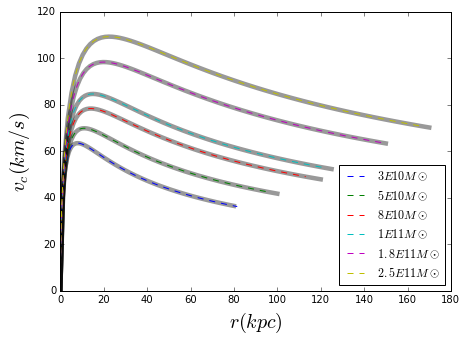

In [63]:
figure(figsize=(7, 5))

# ---------------- Theoretical -----------------------
plot(x1, vc_1, c='k', lw=4.5, alpha=0.4)
plot(x2, vc_2, c='k', lw=4.5, alpha=0.4)
plot(x3, vc_3, c='k', lw=4.5, alpha=0.4)
plot(x4, vc_4, c='k' ,lw=4.5, alpha=0.4)
plot(x5, vc_5, c='k', lw=4.5, alpha=0.4)
plot(x6, vc_6, c='k', lw=4.5, alpha=0.4)

# GalIC

plot(data_n_LMC1[:,0]/h, data_n_LMC1[:,1], lw=1,  ls='--', label='$3E10M\odot$')
plot(data_n_LMC2[:,0]/h, data_n_LMC2[:,1], lw=1,  ls='--', label='$5E10M\odot$')
plot(data_n_LMC3[:,0]/h, data_n_LMC3[:,1], lw=1,  ls='--', label='$8E10M\odot$')
plot(data_n_LMC4[:,0]/h, data_n_LMC4[:,1], lw=1,  ls='--', label='$1E11M\odot$')
plot(data_n_LMC5[:,0]/h, data_n_LMC5[:,1], lw=1,  ls='--', label='$1.8E11M\odot$')
plot(data_n_LMC6[:,0]/h, data_n_LMC6[:,1], lw=1,  ls='--', label='$2.5E11M\odot$')
legend(loc='best')

xlabel('$r(kpc)$', fontsize=20)
ylabel('$v_c(km/s)$', fontsize=20)
savefig('LMC_rotcurves.png', bbox_inches='tight')

In [172]:
3E10/0.7

42857142857.14286

$M_{vir} \& R_{vir}$

In [88]:
h = 0.7
Delta_vir = 360
Omega_m = 0.27

def method1(Mvir):
    Rvir = 206 / h * units.kpc * (Delta_vir * Omega_m / 97.2)**(-1.0/3.0) * (Mvir * h / (1E12 * units.Msun) )**(1.0/3.0)
    return Rvir.to(units.kpc)

def method2(Mvir):
    Rvir = (2*G / (H*0.7)**2)**(1/3.0) * (Mvir / (Delta_vir * Omega_m))**(1/3.0)
    return Rvir.to(units.kpc)

In [89]:
Mvir = 1E12 * units.Msun

In [90]:
print 'method 1 ', method1(Mvir)
print 'method 2 ', method2(Mvir)

method 1  261.29746337 kpc
method 2  262.391566682 kpc


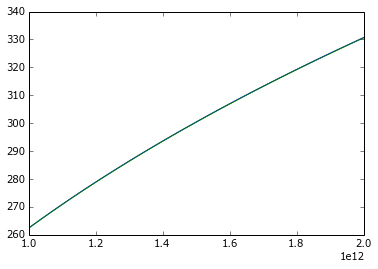

In [131]:
MM = linspace(1E12, 2E12, 100) * units.Msun
plot(MM, method1(MM)*1.0045)
plot(MM, method2(MM))

In [91]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [49]:
 H = 3.2407789E-18  / units.s 

In [82]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [57]:
V = 128.04 * units.km / units.s
Mvir_deduced  = V**3 / (sqrt(48.6) * G * H) 
Rvir_deduced = V / (6.97 * H *0.7)

In [58]:
print Mvir_deduced.to(units.Msun)
print Rvir_deduced.to(units.kpc)

6.9990170459e+11 solMass
262.430857527 kpc


In [59]:
102/0.7

145.71428571428572